<div style="background: linear-gradient(120deg,rgb(6, 36, 168) 60%, #094a68 100%); padding: 24px 32px; border-radius: 12px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <span style="color:#ffe082;">Project Overview: <span style="color:#fff176;">Clustering Health Data</span></span>

This notebook explores <b style="color:#80cbc4;">unsupervised learning</b> to uncover patterns in a synthetic health and lifestyle dataset.  
The workflow includes:

---

<ul style="font-size:1.08em;">
    <li>
        <b style="color:#ffd54f;">Data Cleaning & Preprocessing:</b>
        <ul>
            <li style="color:#b2ff59;">Handling missing values</li>
            <li style="color:#b2ff59;">Encoding categorical and ordinal variables</li>
            <li style="color:#b2ff59;">Removing outliers for robust analysis</li>
            <li style="color:#b2ff59;">Selecting relevant features for clustering</li>
        </ul>
    </li>
    <li>
        <b style="color:#ffd54f;">Clustering & Evaluation:</b>
        <ul>
            <li style="color:#40c4ff;">Determining optimal clusters (Elbow, Silhouette, Davies-Bouldin)</li>
            <li style="color:#40c4ff;">Applying <b style="color:#ffab91;">K-Means</b> clustering</li>
            <li style="color:#40c4ff;">Visualizing clusters with <b style="color:#ffd54f;">PCA</b> and interpreting results</li>
        </ul>
    </li>
    <li>
        <b style="color:#ffd54f;">Insights:</b>
        <ul>
            <li style="color:#ffe082;">Clusters reveal distinct health and lifestyle patterns</li>
            <li style="color:#ffe082;">Actionable insights into exercise, diet, stress, and sleep</li>
        </ul>
    </li>
</ul>

---

<span style="color:#fffde7;">
This iterative process ensures that the clusters are <b style="color:#b2ff59;">meaningful</b>, <b style="color:#40c4ff;">interpretable</b>, and <b style="color:#ffd54f;">valuable</b> for understanding health-related behaviors in the dataset.
</span>

</div>

#
<div style="background: linear-gradient(135deg, rgb(6, 156, 131), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">1.Import libraries</h2>
</div>

In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler


#
<div style="background: linear-gradient(135deg, rgb(6, 156, 131), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">2.Import Dataset </h2>
</div>

In [8]:
df= pd.read_csv('synthetic_health_lifestyle_dataset.csv')  # Load your dataset

#
<div style="background: linear-gradient(135deg, rgb(6, 156, 131), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">3.Exploratory Data Analysis Lets Explore The Dataset </h2>
</div>

In [9]:
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,1,56,Other,177.6,37.3,11.8,Yes,NaN,Poor,NaN,No,9,8.5
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7500 non-null   int64  
 1   Age                  7500 non-null   int64  
 2   Gender               7500 non-null   object 
 3   Height_cm            7500 non-null   float64
 4   Weight_kg            7500 non-null   float64
 5   BMI                  7500 non-null   float64
 6   Smoker               7500 non-null   object 
 7   Exercise_Freq        5621 non-null   object 
 8   Diet_Quality         7500 non-null   object 
 9   Alcohol_Consumption  5608 non-null   object 
 10  Chronic_Disease      7500 non-null   object 
 11  Stress_Level         7500 non-null   int64  
 12  Sleep_Hours          7500 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 761.8+ KB


<style>
.feature-table th, .feature-table td {
    padding: 8px 12px;
    border: 1px solid #dee2e6;
    text-align: left;
}
.feature-table {
    border-collapse: collapse;
    width: 100%;
    font-size: 14px;
}
.feature-table th {
    background-color: #4F8EF7;
    color: #fff;
}
.feature-table tr:nth-child(even) {
    background-color: #f2f6fc;
}
.feature-table tr:nth-child(odd) {
    background-color: #e9f0fa;
}
.feature-table td:first-child {
    font-weight: bold;
    color: #2d3e50;
}
.type-bold {
    font-weight: bold;
    color: #007b83;
}
.desc-bold {
    font-weight: bold;
    color: #b35c00;
}
</style>

# <span style="color:#db8009">**3.1.Feature Overview**</span>

<table class="feature-table">
    <tr>
        <th>Feature</th>
        <th>Type</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>ID</td>
        <td class="type-bold">Identifier</td>
        <td class="desc-bold">Unique ID for each person (can be dropped for modeling)</td>
    </tr>
    <tr>
        <td>Age</td>
        <td class="type-bold">Numeric</td>
        <td class="desc-bold">Age in years</td>
    </tr>
    <tr>
        <td>Gender</td>
        <td class="type-bold">Categorical</td>
        <td class="desc-bold">Gender identity (Male, Female, Other)</td>
    </tr>
    <tr>
        <td>Height_cm</td>
        <td class="type-bold">Numeric</td>
        <td class="desc-bold">Height in centimeters</td>
    </tr>
    <tr>
        <td>Weight_kg</td>
        <td class="type-bold">Numeric</td>
        <td class="desc-bold">Weight in kilograms</td>
    </tr>
    <tr>
        <td>BMI</td>
        <td class="type-bold">Numeric</td>
        <td class="desc-bold">Body Mass Index (can be calculated from height and weight if needed)</td>
    </tr>
    <tr>
        <td>Smoker</td>
        <td class="type-bold">Categorical</td>
        <td class="desc-bold">Smoking status (Yes/No)</td>
    </tr>
    <tr>
        <td>Exercise_Freq</td>
        <td class="type-bold">Ordinal</td>
        <td class="desc-bold">Frequency of exercise (e.g., None, 1–2/week, Daily)</td>
    </tr>
    <tr>
        <td>Diet_Quality</td>
        <td class="type-bold">Ordinal</td>
        <td class="desc-bold">Diet quality (Poor, Fair, Good, Excellent)</td>
    </tr>
    <tr>
        <td>Alcohol_Consumption</td>
        <td class="type-bold">Ordinal</td>
        <td class="desc-bold">Alcohol intake level (None, Low, Moderate, High)</td>
    </tr>
    <tr>
        <td>Chronic_Disease</td>
        <td class="type-bold">Categorical</td>
        <td class="desc-bold">Presence of chronic diseases (Yes/No)</td>
    </tr>
    <tr>
        <td>Stress_Level</td>
        <td class="type-bold">Numeric</td>
        <td class="desc-bold">Stress score (e.g., on a 1–10 scale)</td>
    </tr>
    <tr>
        <td>Sleep_Hours</td>
        <td class="type-bold">Numeric</td>
        <td class="desc-bold">Average hours of sleep per night</td>
    </tr>
</table>


In [11]:
df.shape

(7500, 13)

In [12]:
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Height_cm                 0
Weight_kg                 0
BMI                       0
Smoker                    0
Exercise_Freq          1879
Diet_Quality              0
Alcohol_Consumption    1892
Chronic_Disease           0
Stress_Level              0
Sleep_Hours               0
dtype: int64

In [13]:
df.describe()

,ID,Age,Height_cm,Weight_kg,BMI,Stress_Level,Sleep_Hours
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,3750.500000,43.653333,164.949467,70.036040,26.032493,5.591867,7.002933
std,2165.207842,14.911816,9.960921,14.741595,6.432411,2.865983,1.514014
min,1.000000,18.000000,124.500000,17.700000,6.500000,1.000000,1.900000
25%,1875.750000,31.000000,158.100000,59.900000,21.600000,3.000000,6.000000
50%,3750.500000,43.000000,164.900000,70.100000,25.600000,6.000000,7.000000
75%,5625.250000,57.000000,171.600000,80.100000,30.100000,8.000000,8.000000
max,7500.000000,69.000000,197.000000,128.500000,56.800000,10.000000,12.600000


<div style="background: linear-gradient(120deg,rgb(43, 5, 26) 60%,rgb(179, 30, 79) 100%); padding: 24px 32px; border-radius: 12px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <span style="color:#db8009">**3.2.Data Summary**</span>

- <span style="color:#3498db"><b>Total Records:</b></span> <span style="color:#2ecc71">7,500</span>  
- <span style="color:#3498db"><b>Total Features:</b></span> <span style="color:#2ecc71">13</span>  

- <span style="color:#e74c3c"><b>Missing Data:</b></span> Present in 2 columns  
  - <code style="color:#e67e22">Exercise_Freq</code>: <span style="color:#e67e22">1,879 missing values</span>  
  - <code style="color:#e67e22">Alcohol_Consumption</code>: <span style="color:#e67e22">1,892 missing values</span>  

---
<span style="color:#e8eaed; font-size:1.13em;">

## <span style="color:C">Preprocessing Recommendations</span>

- <b>Handle Missing Values:</b>  
  Impute <code>Exercise_Freq</code> and <code>Alcohol_Consumption</code> with the mode (most frequent value) or assign a "None"/"Never" category if missingness means absence.

- <b>Drop Redundant Columns:</b>  
  Remove <code>Height_cm</code> and <code>Weight_kg</code> if <code>BMI</code> is already calculated from them.

- <b>Encode Categorical Variables:</b>  
  Use label encoding for binary variables (e.g., <code>Smoker</code>, <code>Chronic_Disease</code>), ordinal mapping for ordered features (e.g., <code>Diet_Quality</code>, <code>Exercise_Freq</code>), and one-hot encoding for nominal variables (e.g., <code>Gender</code>).

- <b>Scale Numerical Features:</b>  
  Apply standardization or normalization to <code>Age</code>, <code>Height_cm</code>, <code>Weight_kg</code>, and <code>Sleep_Hours</code>.

- <b>Explore Unsupervised Learning:</b>  
  Use PCA or t-SNE for dimensionality reduction and visualization.  
  Apply clustering algorithms such as KMeans, Agglomerative, or OPTICS to segment health profiles.

</div>


In [14]:
# Drop ID column (not useful for modeling)
df.drop(columns=["ID"], inplace=True)

<div style="background: linear-gradient(90deg, #f8e7d2 60%, #ffe6b3 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(255, 193, 7, 0.08);">

# <span style="color:#db8009">**3.3.What is BMI?**</span>
 
<span style="color:#2d3e50;">
BMI stands for <b>Body Mass Index</b> — a widely used metric to assess a person’s body fat based on their weight and height.
</span>

<ul style="color:#4F8EF7; font-size:1.05em;">
	<li><b>Purpose:</b>
		<ul>
			<li style="color:#b35c00;">Helps categorize individuals as underweight, normal weight, overweight, or obese.</li>
			<li style="color:#b35c00;">Used by healthcare professionals as a quick screening tool for potential health risks.</li>
		</ul>
	</li>
</ul>
</div>


In [15]:
# Drop columns height,weight because bmi is defined from it
df.drop(columns=["Height_cm", "Weight_kg"], inplace=True)


In [16]:
df.head()

,Age,Gender,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,56,Other,11.8,Yes,NaN,Poor,NaN,No,9,8.5
1,69,Other,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,46,Female,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,32,Male,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,60,Male,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1


In [17]:
df.isnull().sum()

Age                       0
Gender                    0
BMI                       0
Smoker                    0
Exercise_Freq          1879
Diet_Quality              0
Alcohol_Consumption    1892
Chronic_Disease           0
Stress_Level              0
Sleep_Hours               0
dtype: int64

In [18]:
#percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:\n", missing_percentage)

Percentage of missing values in each column:
 Age                     0.000000
Gender                  0.000000
BMI                     0.000000
Smoker                  0.000000
Exercise_Freq          25.053333
Diet_Quality            0.000000
Alcohol_Consumption    25.226667
Chronic_Disease         0.000000
Stress_Level            0.000000
Sleep_Hours             0.000000
dtype: float64


In [19]:
#print the rows where missing values are present
df[df.isnull().any(axis=1)]

,Age,Gender,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,56,Other,11.8,Yes,NaN,Poor,NaN,No,9,8.5
8,36,Male,13.2,No,Daily,Average,NaN,No,6,6.3
14,57,Other,27.1,No,NaN,Average,High,No,6,8.0
16,20,Female,25.9,No,1-2 times/week,Average,NaN,Yes,2,5.4
18,19,Female,23.5,Yes,NaN,Poor,Moderate,No,10,3.6
...,...,...,...,...,...,...,...,...,...,...
7482,18,Other,27.0,No,3-5 times/week,Average,NaN,Yes,9,6.9
7483,46,Other,19.4,Yes,Daily,Average,NaN,No,9,7.1
7485,21,Female,26.4,Yes,NaN,Average,NaN,Yes,6,4.6
7487,20,Male,22.5,No,Daily,Poor,NaN,No,10,7.5


<div style="background: linear-gradient(90deg, #f7cac9 60%, #92a8d1 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

<span style="font-size:2.1em; color:#b35c00; font-weight:bold;">3.4.
We impute missing values in <code style="color:#db8009;">Exercise_Freq</code> and <code style="color:#db8009;">Alcohol_Consumption</code> with "<span style="color:#007b83;">Never</span>" because, in many cases, the absence of a response likely indicates that the individual does not engage in exercise or does not consume alcohol.
</span>
<br><br>
<span style="color:#2d3e50;">
This approach is appropriate since the missingness is not random, but rather reflects a meaningful category for these lifestyle behaviors.
</span>
</div>

In [20]:
#fill missing values with Never means never exercise and never alcohol consumption
df.fillna({"Exercise_Freq": "Never", "Alcohol_Consumption": "Never"}, inplace=True)

df.isnull().sum()

Age                    0
Gender                 0
BMI                    0
Smoker                 0
Exercise_Freq          0
Diet_Quality           0
Alcohol_Consumption    0
Chronic_Disease        0
Stress_Level           0
Sleep_Hours            0
dtype: int64

In [21]:
df.head()

,Age,Gender,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,56,Other,11.8,Yes,Never,Poor,Never,No,9,8.5
1,69,Other,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,46,Female,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,32,Male,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,60,Male,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1


In [22]:
#value counts of each column

for column in df.columns:
    print(f"Value counts for '{column}':")
    print(df[column].value_counts())
    print()

Value counts for 'Age':
Age
64    180
62    175
45    167
66    166
52    165
49    162
43    162
34    160
40    159
42    159
25    157
39    155
38    154
46    152
21    151
57    151
30    150
54    149
28    148
36    147
68    147
37    147
29    144
23    143
51    143
56    142
32    142
47    142
20    142
61    142
19    141
35    140
41    140
53    139
55    137
69    137
26    137
50    135
59    135
18    135
22    134
33    133
31    133
58    132
63    131
65    130
27    129
60    128
67    125
44    119
48    114
24    113
Name: count, dtype: int64

Value counts for 'Gender':
Gender
Male      2551
Female    2510
Other     2439
Name: count, dtype: int64

Value counts for 'BMI':
BMI
25.9    67
24.7    61
24.1    60
26.8    59
22.8    59
        ..
56.8     1
43.1     1
9.6      1
42.2     1
9.3      1
Name: count, Length: 383, dtype: int64

Value counts for 'Smoker':
Smoker
No     5263
Yes    2237
Name: count, dtype: int64

Value counts for 'Exercise_Freq':
Exercise_Fr

<div style="background: linear-gradient(90deg, #f7cac9 60%, #92a8d1 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <h3 style="color:#b35c00;">**3.5.Key Insights from Value Counts**</h3>

<ul style="font-size:1.08em;">
    <li><b style="color:#db8009;">Age:</b> <span style="color:#2d3e50;">Most common is <b style="color:#4F8EF7;">64 years</b> (180 people); ages 18–69, well-distributed.</span></li>
    <li><b style="color:#db8009;">Gender:</b> <span style="color:#2d3e50;">Nearly equal counts for <b style="color:#4F8EF7;">Male</b>, <b style="color:#e67e22;">Female</b>, and <b style="color:#b35c00;">Other</b>.</span></li>
    <li><b style="color:#db8009;">BMI:</b> <span style="color:#2d3e50;">383 unique values; outliers present (<b style="color:#e74c3c;">as low as 9.3, as high as 56.8</b>).</span></li>
    <li><b style="color:#db8009;">Smoker:</b> <span style="color:#2d3e50;">~<b style="color:#2ecc71;">70% non-smokers</b>, ~<b style="color:#e74c3c;">30% smokers</b>.</span></li>
    <li><b style="color:#db8009;">Exercise Frequency:</b> <span style="color:#2d3e50;">Evenly split among <b style="color:#4F8EF7;">Daily</b>, <b style="color:#b35c00;">Never</b>, <b style="color:#e67e22;">1–2</b>, and <b style="color:#2ecc71;">3–5 times/week</b>.</span></li>
    <li><b style="color:#db8009;">Diet Quality:</b> <span style="color:#2d3e50;">Fairly balanced; <b style="color:#2ecc71;">Good</b>, <b style="color:#e74c3c;">Poor</b>, <b style="color:#e67e22;">Average</b>, <b style="color:#4F8EF7;">Excellent</b> all near 25%.</span></li>
    <li><b style="color:#db8009;">Alcohol Consumption:</b> <span style="color:#2d3e50;"><b style="color:#b35c00;">Low</b>, <b style="color:#e67e22;">Never</b>, <b style="color:#e74c3c;">High</b>, <b style="color:#2ecc71;">Moderate</b> all similar in count.</span></li>
    <li><b style="color:#db8009;">Chronic Disease:</b> <span style="color:#2d3e50;"><b style="color:#e74c3c;">19%</b> have a chronic condition.</span></li>
    <li><b style="color:#db8009;">Stress Level:</b> <span style="color:#2d3e50;">Uniform 1–10; most common are <b style="color:#e74c3c;">8</b>, <b style="color:#4F8EF7;">10</b>, <b style="color:#2ecc71;">7</b>.</span></li>
    <li><b style="color:#db8009;">Sleep Hours:</b> <span style="color:#2d3e50;">102 unique values; outliers (<b style="color:#e74c3c;">2.3</b>, <b style="color:#4F8EF7;">12.6</b>) exist.</span></li>
</ul>

<hr style="border-top: 1.5px solid #b35c00;">

<h4 style="color:#4F8EF7;">Almost All Columns Are Well-Distributed</h4>

</div>


In [23]:
df.head()

,Age,Gender,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,56,Other,11.8,Yes,Never,Poor,Never,No,9,8.5
1,69,Other,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,46,Female,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,32,Male,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,60,Male,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1


#
<div style="background: linear-gradient(135deg, rgb(6, 156, 131), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">3.6.Lets Deal With Outliers </h2>
</div>

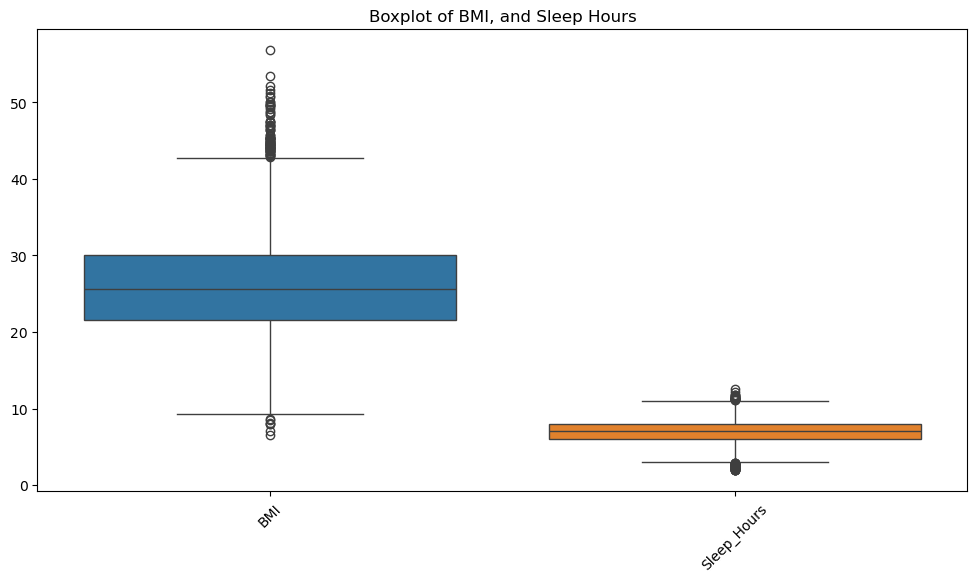

In [24]:
#make a boxplot of bmi,stress_level,sleep_hours
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['BMI','Sleep_Hours']])
plt.title('Boxplot of BMI, and Sleep Hours')
plt.xticks(rotation=45)
plt.show()

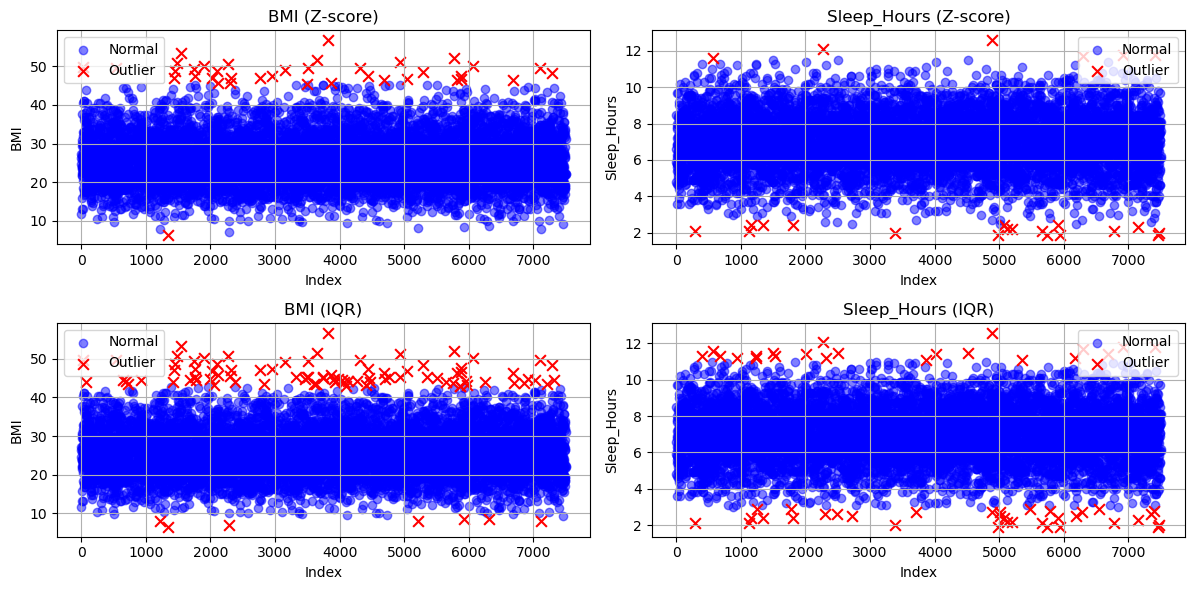

In [25]:
from scipy.stats import zscore

bmi = df[['BMI','Sleep_Hours']].values

# 1. Z-score method
z_scores = zscore(bmi)
z_outliers = np.abs(z_scores) > 3

# 2. IQR method
q1 = np.percentile(bmi, 25, axis=0)
q3 = np.percentile(bmi, 75, axis=0)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
iqr_outliers = (bmi < lower_bound) | (bmi > upper_bound)

# Plotting for each feature
features = ['BMI','Sleep_Hours']
methods = [
    ('Z-score', z_outliers),
    ('IQR', iqr_outliers)
]

plt.figure(figsize=(18, 6))
for m, (title, outlier_mask) in enumerate(methods):
    for i, feature in enumerate(features):
        plt.subplot(2, 3, m*3 + i + 1)
        idx = np.arange(bmi.shape[0])
        # Plot normal points
        plt.scatter(idx[~outlier_mask[:, i]], bmi[~outlier_mask[:, i], i], c='blue', label='Normal', alpha=0.5)
        # Plot outliers
        plt.scatter(idx[outlier_mask[:, i]], bmi[outlier_mask[:, i], i], c='red', label='Outlier', marker='x', s=60)
        plt.xlabel('Index')
        plt.ylabel(feature)
        plt.title(f"{feature} ({title})")
        plt.legend()
        plt.grid(True)
plt.tight_layout()
plt.show()


<div style="background: linear-gradient(90deg, #f7cac9 60%, #92a8d1 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

<span style="font-size:2.15em; color:#b35c00; font-weight:bold;">3.7.
Use <span style="color:#db8009;">IQR</span> for both <span style="color:#4F8EF7;">BMI</span> and <span style="color:#4F8EF7;">Sleep_Hours</span> in your dataset — it's more robust and detects outliers more effectively in this case, as seen in your plots.
</span>

</div>

In [26]:
#use iqr method to remove outliers 
bmi = df[['BMI','Sleep_Hours']].values
q1 = np.percentile(bmi, 25, axis=0)
q3 = np.percentile(bmi, 75, axis=0)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
iqr_outliers = (bmi < lower_bound) | (bmi > upper_bound)
df = df[~iqr_outliers.any(axis=1)]

#
<div style="background: linear-gradient(135deg, rgb(6, 156, 131), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">3.8.After Removing Outliers</h2>
</div>

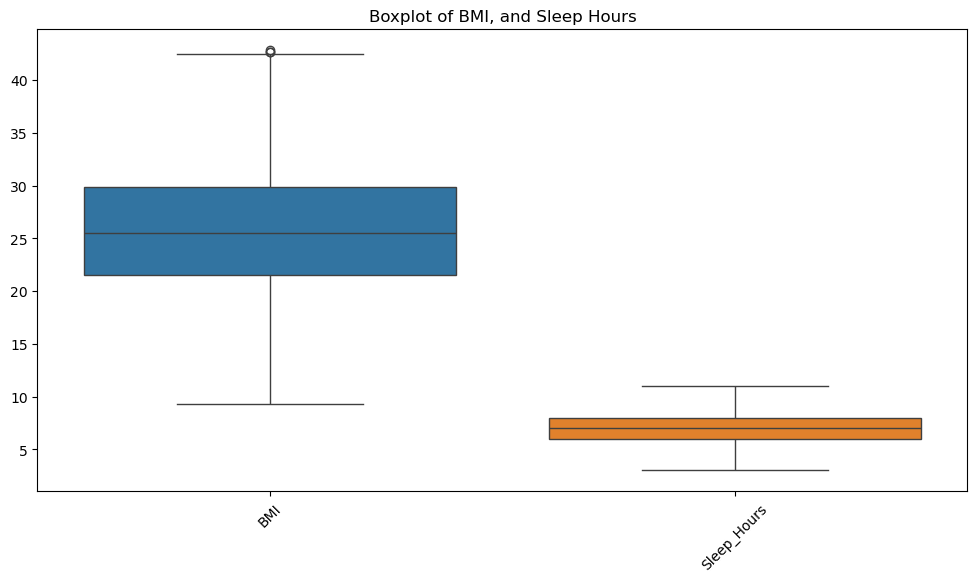

In [27]:
#make a boxplot of bmi,stress_level,sleep_hours
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['BMI','Sleep_Hours']])
plt.title('Boxplot of BMI, and Sleep Hours')
plt.xticks(rotation=45)
plt.show()

In [28]:
df.head()

,Age,Gender,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,56,Other,11.8,Yes,Never,Poor,Never,No,9,8.5
1,69,Other,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,46,Female,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,32,Male,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,60,Male,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1


#
<div style="background: linear-gradient(135deg, rgb(6, 156, 131), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">3.9. Data Cleaning Complete</h2>
   <p style="font-size:1.15em; margin-top: 12px;">
      <b>All major data quality issues have been addressed:</b>
      <ul style="margin-left: 18px;">
         <li><b>Missing values</b> in Exercise_Freq and Alcohol_Consumption have been imputed with "Never".</li>
         <li><b>Redundant columns</b> (ID,Height_cm,Weight_kg) have been dropped.</li>
         <li><b>Outliers</b> in BMI and Sleep_Hours have been removed using the IQR method.</li>
         <li><b>Data types</b> and <b>feature distributions</b> have been checked and summarized.</li>
      </ul>
      <span style="color:#ffe082;">
         The dataset is now ready for feature engineering, encoding, and clustering analysis.
      </span>
   </p>
</div>

In [29]:
#save the cleaned dataset
df.to_csv('cleaned_data.csv', index=False)

In [30]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

In [31]:
df.head()

,Age,Gender,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,56,Other,11.8,Yes,Never,Poor,Never,No,9,8.5
1,69,Other,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,46,Female,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,32,Male,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,60,Male,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1



# <span style="color:#db8009">**4.Selecting Relevant Features for Health Clustering**</span>

<div style="background: linear-gradient(90deg, #f7cac9 60%, #92a8d1 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

<span style="font-size:1.15em; color:#b35c00;">
To ensure <b style="color:#4F8EF7;">meaningful</b> and <b style="color:#2ecc71;">interpretable clusters</b>, we will retain only the features that are most relevant for health and lifestyle segmentation.<br>
Irrelevant or redundant columns will be <b style="color:#e74c3c;">removed</b> before proceeding with clustering analysis.
</span>

</div>

In [32]:
#remove age and gender columns
df.drop(columns=["Age","Gender","Chronic_Disease","Smoker","Alcohol_Consumption","BMI"], inplace=True)

In [33]:
df.head()

,Exercise_Freq,Diet_Quality,Stress_Level,Sleep_Hours
0,Never,Poor,9,8.5
1,1-2 times/week,Good,2,5.9
2,Daily,Excellent,3,4.8
3,3-5 times/week,Excellent,9,6.6
4,3-5 times/week,Excellent,6,6.1


# <span style="color:#db8009;">**5.Encoding Categorical Features**</span>

<div style="background: linear-gradient(90deg,rgb(236, 224, 214) 60%,rgb(220, 166, 156) 100%); border-radius: 10px; padding: 16px 22px; box-shadow: 0 2px 8px rgba(12, 109, 173, 0.08);">

<span style="color:#8796ed;"><b>To prepare the data for clustering, we need to convert categorical variables into numeric codes that algorithms can process. This step ensures that features like <span style="color:#4F8EF7;"><b>exercise frequency</b></span> and <span style="color:#4F8EF7;"><b>diet quality</b></span> are represented in a way that reflects their order or categories.

<ul>
    <li>
        <b style="color:#b35c00;">Ordinal Encoding:</b>
        <br>
        <span style="color:#8796ed;">
            Map ordered categories (e.g., <code style="color:#db8009;">Exercise_Freq</code>, <code style="color:#db8009;">Diet_Quality</code>) to meaningful numeric values.
        </span>
    </li>
</ul>

<span style="color:#4F8EF7;">
This encoding step is crucial for effective clustering and meaningful interpretation of health and lifestyle patterns.
</span>

</div>

In [34]:
# Map 'Exercise_Freq' string categories to numeric values
df['Exercise_Freq'] = df['Exercise_Freq'].replace({
    '1-2 times/week': 2,
    '3-5 times/week': 4,
    'Daily': 7,
    'Never': 0
})

C:\Users\U S\AppData\Local\Temp\ipykernel_15456\1410856404.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Exercise_Freq'] = df['Exercise_Freq'].replace({


In [35]:
#diet_quality to numeric values to poor 0,average 1,good 2,excellent 3
df['Diet_Quality'] = df['Diet_Quality'].map({'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent': 3})

In [36]:
df.head()

,Exercise_Freq,Diet_Quality,Stress_Level,Sleep_Hours
0,0,0,9,8.5
1,2,2,2,5.9
2,7,3,3,4.8
3,4,3,9,6.6
4,4,3,6,6.1


# <span style="color:#db8009;">**6.Determining the Optimal Number of Clusters for K-Means**</span>

<div style="background: linear-gradient(90deg,rgb(247, 240, 240) 60%,rgb(250, 244, 242) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

<span style="font-size:1.15em; color:#8796ed;">
Before applying <b style="color:#4F8EF7;">K-Means clustering</b>, it's essential to identify the most suitable number of clusters (<code style="color:#db8009;">k</code>) for our health and lifestyle dataset.<br>
We'll use methods like the <b style="color:#e74c3c;">Elbow Method</b>, <b style="color:#2ecc71;">Silhouette Score</b>, and <b style="color:#b35c00;">Davies-Bouldin Index</b> to guide our selection and ensure meaningful, interpretable clusters.
</span>

</div>

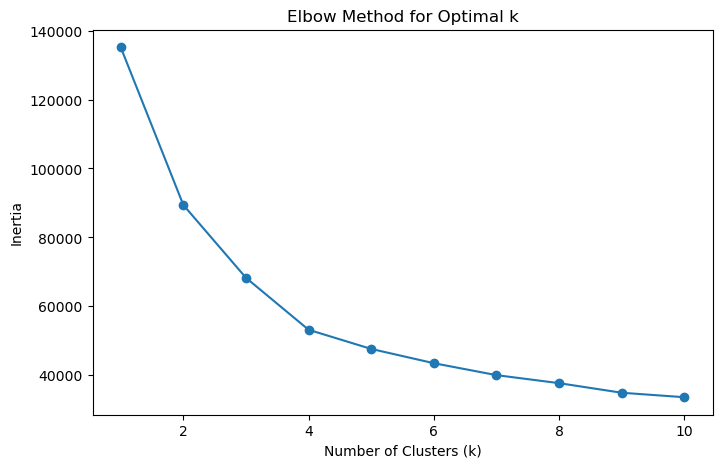

In [37]:
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [38]:
df.head()

,Exercise_Freq,Diet_Quality,Stress_Level,Sleep_Hours
0,0,0,9,8.5
1,2,2,2,5.9
2,7,3,3,4.8
3,4,3,9,6.6
4,4,3,6,6.1


In [39]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    # Use a sample size to avoid MemoryError
    score = silhouette_score(df, labels, sample_size=1000, random_state=42)
    print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=2: 0.3020
Silhouette Score for k=3: 0.2816
Silhouette Score for k=4: 0.2800
Silhouette Score for k=5: 0.2393
Silhouette Score for k=6: 0.2349
Silhouette Score for k=7: 0.2344
Silhouette Score for k=8: 0.2414
Silhouette Score for k=9: 0.2319
Silhouette Score for k=10: 0.2277


In [40]:
from sklearn.metrics import davies_bouldin_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    db_index = davies_bouldin_score(df, labels)
    print(f"Davies-Bouldin Index for k={k}: {db_index:.4f}")


Davies-Bouldin Index for k=2: 1.3330
Davies-Bouldin Index for k=3: 1.1457
Davies-Bouldin Index for k=4: 1.1637
Davies-Bouldin Index for k=5: 1.2679
Davies-Bouldin Index for k=6: 1.3452
Davies-Bouldin Index for k=7: 1.3914
Davies-Bouldin Index for k=8: 1.3679
Davies-Bouldin Index for k=9: 1.3561
Davies-Bouldin Index for k=10: 1.4282


<div style="background: linear-gradient(90deg,rgb(46, 10, 9) 60%,rgb(79, 8, 5) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <span style="color:#db8009;">**6.1.So I will choose <b>k=3</b> as it has the <span style="color:#4F8EF7;">good silhouette score</span> and <span style="color:#2ecc71;">lowest davies-bouldin index**</span></span>

</div>

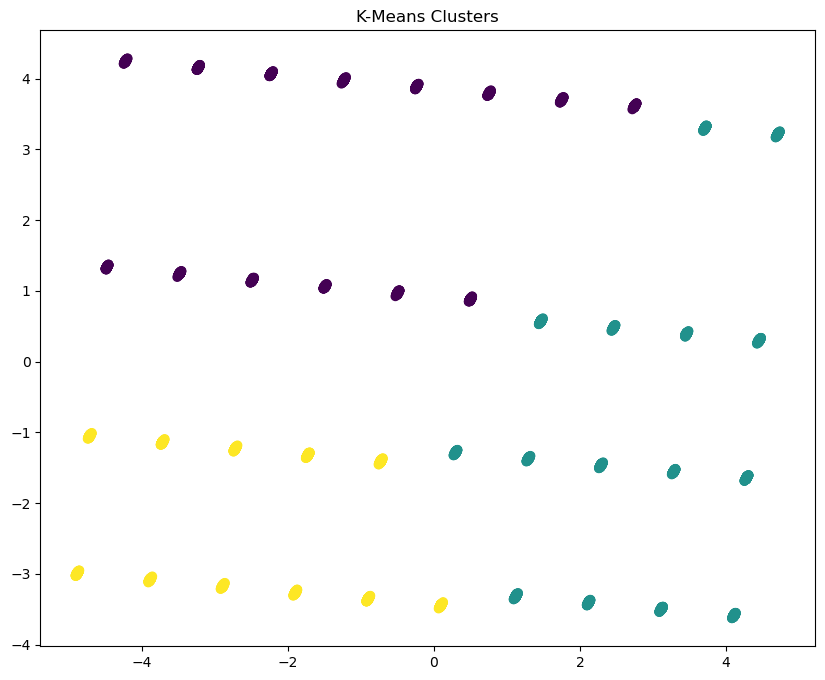

In [41]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(df)

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df["Cluster"], cmap="viridis")
plt.title("K-Means Clusters")
plt.show()

In [42]:
df.head()

,Exercise_Freq,Diet_Quality,Stress_Level,Sleep_Hours,Cluster
0,0,0,9,8.5,1
1,2,2,2,5.9,2
2,7,3,3,4.8,0
3,4,3,9,6.6,1
4,4,3,6,6.1,0


In [58]:
# Print 200 rows at random
sampled_df = df.sample(n=10, random_state=42)
for i in range(len(sampled_df)):
    print(sampled_df.iloc[i])
    print("\n")

Exercise_Freq                                                         2
Diet_Quality                                                          2
Stress_Level                                                          9
Sleep_Hours                                                         7.8
Cluster                                                               1
PCA1                                                           3.336704
PCA2                                                          -1.439449
Cluster_Label         Least Active & High Stress sleep Varied with M...
short_descriptions    Least Active group with low physical activity ...
Name: 4525, dtype: object


Exercise_Freq                                                         7
Diet_Quality                                                          2
Stress_Level                                                          5
Sleep_Hours                                                         7.1
Cluster                             

<div style="background: linear-gradient(90deg,rgb(252, 230, 224) 60%, #cfdef3 100%); border-radius: 12px; padding: 22px 28px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.10);">

# <span style="color:#4F8EF7;">**7.Boxplots of Each Feature by Cluster**</span>

<span style="color:#2d3e50; font-size:1.08em;">
Visualizing the distribution of each key feature across clusters helps us understand the unique characteristics of each group. Below, we use boxplots to compare <b style="color:#b35c00;">Exercise_Freq</b>, <b style="color:#b35c00;">Diet_Quality</b>, <b style="color:#b35c00;">Stress_Level</b>, and <b style="color:#b35c00;">Sleep_Hours</b> for each cluster.
</span>

<ul style="font-size:1.07em;">
    <li><b style="color:#db8009;">Exercise_Freq:</b> <span style="color:#2d3e50;">How often individuals exercise in each cluster.</span></li>
    <li><b style="color:#db8009;">Diet_Quality:</b> <span style="color:#2d3e50;">The quality of diet reported by cluster members.</span></li>
    <li><b style="color:#db8009;">Stress_Level:</b> <span style="color:#2d3e50;">Stress scores across clusters.</span></li>
    <li><b style="color:#db8009;">Sleep_Hours:</b> <span style="color:#2d3e50;">Average sleep duration per cluster.</span></li>
</ul>

<span style="color:#4F8EF7;">
These plots reveal how lifestyle patterns differ between clusters and highlight the main factors that distinguish each group.
</span>

</div>

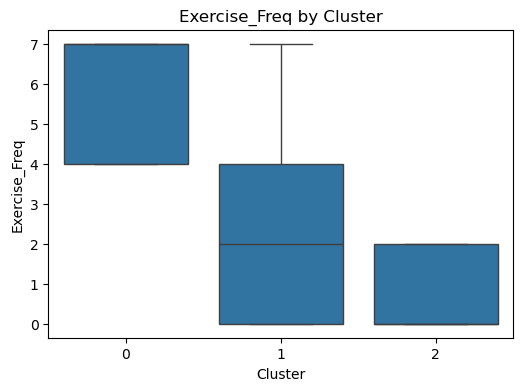

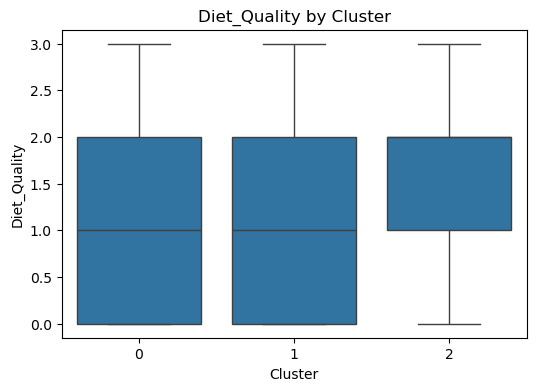

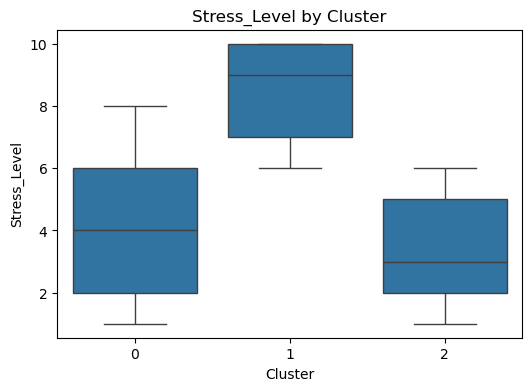

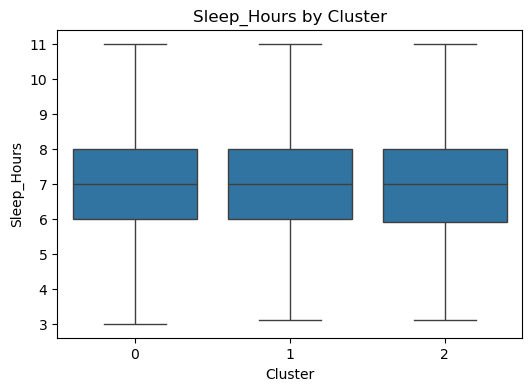

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Exercise_Freq', 'Diet_Quality', 'Stress_Level', 'Sleep_Hours']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'{col} by Cluster')
    plt.show()


<div style="background: linear-gradient(90deg, #f7cac9 60%,rgb(221, 171, 214) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <span style="color:#4F8EF7;">**7.1.Visualizing Clusters with PCA**</span>
<span style="color:#2d3e50;">
To better understand the separation and structure of our clusters, we use <b style="color:#b35c00;">Principal Component Analysis (PCA)</b> to reduce the feature space to two dimensions.  
This allows us to visualize the clusters on a <b style="color:#2ecc71;">2D scatter plot</b>, making patterns and group differences more <b style="color:#db8009;">interpretable</b>.
</span>

</div>

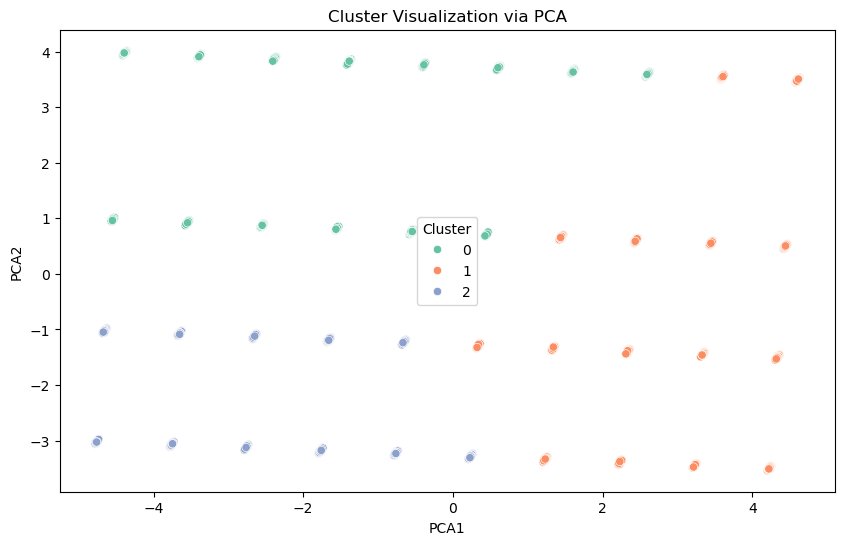

In [45]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(df[['Exercise_Freq', 'Diet_Quality', 'Stress_Level', 'Sleep_Hours']])
df['PCA1'], df['PCA2'] = components[:,0], components[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Cluster Visualization via PCA')
plt.show()


In [46]:
df.head()

,Exercise_Freq,Diet_Quality,Stress_Level,Sleep_Hours,Cluster,PCA1,PCA2
0,0,0,9,8.5,1,3.248953,-3.418137
1,2,2,2,5.9,2,-3.662395,-1.087977
2,7,3,3,4.8,0,-2.410786,3.833493
3,4,3,9,6.6,1,3.429633,0.538689
4,4,3,6,6.1,0,0.431558,0.692909


In [47]:
df.groupby('Cluster').mean()


,Exercise_Freq,Diet_Quality,Stress_Level,Sleep_Hours,PCA1,PCA2
Cluster,,,,,,
0,5.744462,1.477453,4.132911,7.017722,-1.323869,2.552620
1,2.709576,1.473167,8.470712,7.000316,2.846050,-0.709134
2,0.895643,1.514691,3.298886,7.002888,-2.415070,-2.244823


<div style="background: linear-gradient(90deg, #e3f0ff 60%, #fbeee6 100%); border-radius: 12px; padding: 22px 30px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.10);">

# <span style="color:#4F8EF7;">**7.2.Mapping Cluster Labels to Descriptive Names**</span>

<span style="font-size:1.13em; color:#b35c00;">
To enhance interpretability, each cluster is mapped to a descriptive label that summarizes the key lifestyle and health characteristics of its members.
</span>

<ul style="font-size:1.08em;">
    <li>
        <span style="color:#2d3e50;">
            <b style="color:#db8009;">Numeric cluster assignments</b> are translated into <b style="color:#2ecc71;">meaningful group profiles</b> for further analysis and reporting.
        </span>
    </li>
    <li>
        <span style="color:#2d3e50;">
            This mapping allows for <b style="color:#e74c3c;">clearer communication</b> of cluster insights and supports <b style="color:#b35c00;">actionable recommendations</b> based on distinct health and lifestyle patterns.
        </span>

</div>

</div>

In [48]:
label_map = {
    0: "Very Active & Low-Stress sleep Moderate to High with mixed diet",     
    1: "Least Active & High Stress sleep Varied with Mixed diet",    
    2: "Inactive & Low-Stress Consistent in sleep diet is better " 
}
df['Cluster_Label'] = df['Cluster'].map(label_map)

<div style="background: linear-gradient(90deg,rgb(9, 38, 46) 60%,rgb(5, 79, 79) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <span style="color:#db8009;">**8.Lets See The Min,Max,Mean of each cluster**</span></span>

</div>

In [49]:
# i want the min max and mean of each cluster
cluster_stats = df.groupby('Cluster_Label').agg({
    'Exercise_Freq': ['min', 'max', 'mean'],
    'Diet_Quality': ['min', 'max', 'mean'],
    'Stress_Level': ['min', 'max', 'mean'],
    'Sleep_Hours': ['min', 'max', 'mean']
}).reset_index()
print(cluster_stats)

                                       Cluster_Label Exercise_Freq      \
                                                               min max   
0  Inactive & Low-Stress Consistent in sleep diet...             0   2   
1  Least Active & High Stress sleep Varied with M...             0   7   
2  Very Active & Low-Stress sleep Moderate to Hig...             4   7   

            Diet_Quality               Stress_Level               Sleep_Hours  \
       mean          min max      mean          min max      mean         min   
0  0.895643            0   3  1.514691            1   6  3.298886         3.1   
1  2.709576            0   3  1.473167            6  10  8.470712         3.1   
2  5.744462            0   3  1.477453            1   8  4.132911         3.0   

                   
    max      mean  
0  11.0  7.002888  
1  11.0  7.000316  
2  11.0  7.017722  


<div style="background: linear-gradient(120deg,rgb(81, 108, 142) 60%,rgb(128, 123, 119) 100%); border-radius: 14px; padding: 28px 36px; box-shadow: 0 2px 12px rgba(63, 107, 136, 0.12);">

# <span style="color:#4F8EF7;">**8.1.Cluster Label Definitions & Detailed Insights**</span>

Below are detailed descriptions for each cluster identified in the health and lifestyle dataset. These summaries combine <b style="color:#b35c00;">statistical means</b>, <b style="color:#2ecc71;">behavioral patterns</b>, and <b style="color:#e74c3c;">practical interpretations</b> to help you understand the unique characteristics of each group.

---

<div style="margin-top:18px; font-size:1.07em;">
<b style="color:#db8009;">Interpretation:</b><br>
These cluster profiles provide <span style="color:#2ecc71;">actionable insights</span> for health interventions. For example, <b style="color:#c62828;">Cluster 1</b> may need stress management and exercise programs, while <b style="color:#1976d2;">Cluster 0</b> represents a generally healthy lifestyle. <b style="color:#6a1b9a;">Cluster 2</b>, though inactive, maintains low stress and good sleep, suggesting different support needs.
</div>

<br>
<span style="color:#4F8EF7; font-size:1.08em;">
<b>Use these definitions to guide further analysis, reporting, or targeted recommendations for each group.</b>
</span>

</div>

In [50]:

# Define cluster labels and descriptions
cluster_info = {
    0: {
        'Label': 'Very Active & Low-Stress',
        'Exercise_Freq': 'High (typically 7 days/week)',
        'Stress_Level': 'Low (1-5)',
        'Sleep_Hours': 'Moderate to high (varies, but often well-rested)',
        'Diet_Quality': 'Mixed (0-3)',
        'Description': 'Highly active individuals with low stress and generally good sleep habits.'
    },
    1: {
        'Label': 'Least Active & Middle Stress Level',
        'Exercise_Freq': 'Low (typically 0-4 days/week)',
        'Stress_Level': 'Moderate to high (5-10)',
        'Sleep_Hours': 'Varies (some get very little sleep, others get excessive sleep)',
        'Diet_Quality': 'Mixed (0-3)',
        'Description': 'Low physical activity with moderate to high stress levels. Some have poor sleep habits.'
    },
    2: {
        'Label': 'Moderate Activity & High-Stress',
        'Exercise_Freq': 'Moderate (often 0-4 days/week)',
        'Stress_Level': 'High (often 7-10)',
        'Sleep_Hours': 'Varies (some get too little, some too much)',
        'Diet_Quality': 'Mixed (0-3)',
        'Description': 'Moderate exercise but high stress, with inconsistent sleep patterns.'
    }
}

# Function to print cluster summaries
def print_cluster_summary(cluster_num):
    cluster_data = cluster_info[cluster_num]
    print(f"\nCluster {cluster_num}: {cluster_data['Label']}")
    print("-" * 50)
    print(f"Exercise Frequency: {cluster_data['Exercise_Freq']}")
    print(f"Stress Level: {cluster_data['Stress_Level']}")
    print(f"Sleep Hours: {cluster_data['Sleep_Hours']}")
    print(f"Diet Quality: {cluster_data['Diet_Quality']}")
    print(f"\nDescription: {cluster_data['Description']}")
    print("-" * 50)

# Print summaries for all clusters
for cluster in cluster_info:
    print_cluster_summary(cluster)

# Optional: Show basic statistics for each cluster
print("\nBasic Statistics for Each Cluster:")
print("-" * 50)
for cluster in sorted(df['Cluster'].unique()):
    cluster_df = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} ({cluster_info[cluster]['Label']}) Statistics:")
    print(cluster_df.describe())


Cluster 0: Very Active & Low-Stress
--------------------------------------------------
Exercise Frequency: High (typically 7 days/week)
Stress Level: Low (1-5)
Sleep Hours: Moderate to high (varies, but often well-rested)
Diet Quality: Mixed (0-3)

Description: Highly active individuals with low stress and generally good sleep habits.
--------------------------------------------------

Cluster 1: Least Active & Middle Stress Level
--------------------------------------------------
Exercise Frequency: Low (typically 0-4 days/week)
Stress Level: Moderate to high (5-10)
Sleep Hours: Varies (some get very little sleep, others get excessive sleep)
Diet Quality: Mixed (0-3)

Description: Low physical activity with moderate to high stress levels. Some have poor sleep habits.
--------------------------------------------------

Cluster 2: Moderate Activity & High-Stress
--------------------------------------------------
Exercise Frequency: Moderate (often 0-4 days/week)
Stress Level: High (oft

<div style="background: linear-gradient(120deg,rgb(53, 75, 116) 60%,rgb(16, 7, 1) 100%); border-radius: 14px; padding: 28px 36px; box-shadow: 0 2px 12px rgba(52, 152, 219, 0.12);">

# <span style="color:#db8009;">**8.2.Adding Cluster Descriptions to the DataFrame**</span>

<span style="color:#4F8EF7; font-size:1.13em;">
To support further analysis and ensure interpretability, each row in the DataFrame now includes a concise cluster description. This allows for easy reference, reporting, and downstream analytics without losing sight of the cluster's meaning.
</span>

---

<ul style="font-size:1.08em;">
    <li>
        <b style="color:#db8009;">Why?</b><br>
        <span style="color:#4F8EF7;">
            Attaching descriptive labels and summaries directly to the data ensures that any future analysis, visualization, or export will always retain the context of each cluster—making your workflow more robust and transparent.
        </span>
    </li>
    <li>
        <b style="color:#db8009;">How?</b><br>
        <span style="color:#4F8EF7;">
            The <code style="color:#4F8EF7;">short_descriptions</code> column provides a quick summary of each cluster's lifestyle and health profile, while the <code style="color:#4F8EF7;">Cluster_Label</code> column gives a more detailed, human-readable group name.
        </span>
    </li>
</ul>

<div style="background: #f7cac9; border-radius: 8px; padding: 14px 18px; margin-top: 18px;">
    <b style="color:#4F8EF7;">Tip:</b><br>
    <span style="color:#2d3e50;">
        With these descriptions embedded, you can easily filter, group, or visualize the data by cluster meaning—making your insights more actionable and your notebook easier to revisit or share.
    </span>
</div>

</div>

In [51]:
short_descriptions = {
    0: "Very Active individuals with high exercise frequency (≈5–7 days/week), low stress levels, consistent moderate to high sleep duration, and a mixed-quality diet.",
    1: "Least Active group with low physical activity (≈0–4 days/week), high stress levels, variable sleep patterns, and a mixed diet quality.",
    2: "Inactive individuals with minimal exercise, low to moderate stress levels, consistent sleep duration, and relatively better diet quality."
}
df['short_descriptions'] = df['Cluster'].map(short_descriptions)

<style>
  .cluster-table {
    width: 97%;
    border-collapse: collapse;
    font-family: Arial, sans-serif;
    font-size: 17px;
    margin: 20px 0;
  }
  .cluster-table th, .cluster-table td {
    border: 2px solid #ddd;
    padding: 10px;
    vertical-align: top;
    text-align: left;
  }
  .cluster-table th {
    background-color:rgb(0, 3, 5);
    color: white;
    font-weight: bold;
  }
.cluster-row-0 { background-color: rgb(85, 158, 77); }   /* Soft blue */
.cluster-row-1 { background-color: rgb(64, 59, 133); }   /* Soft yellow */
.cluster-row-2 { background-color: rgb(139, 64, 75); }   /* Soft red */

</style>
<div style="background: linear-gradient(120deg,rgb(208, 244, 5),rgb(16, 7, 1) 100%); border-radius: 14px; padding: 28px 36px; box-shadow: 0 2px 12px rgba(52, 152, 219, 0.12);">

# <span style="color:#4F8EF7;">**9.Summary of the clusters**</span>

<table class="cluster-table">
  <thead>
    <tr>
      <th>Cluster</th>
      <th>Label</th>
      <th>Exercise Frequency</th>
      <th>Stress Level</th>
      <th>Sleep Duration</th>
      <th>Diet Quality</th>
      <th>Short Summary</th>
      <th>Full Description</th>
    </tr>
  </thead>
  <tbody>
    <tr class="cluster-row-0">
      <td>0</td>
      <td><strong>Very Active & Low-Stress</strong></td>
      <td>High (mean ≈ 5.74 days/week)</td>
      <td>Low (mean ≈ 4.13)</td>
      <td>Moderate to High (mean ≈ 7.02 hrs)</td>
      <td>Mixed (mean ≈ 1.48)</td>
      <td>Very Active individuals with high exercise frequency, low stress levels, consistent moderate to high sleep, and a mixed diet.</td>
      <td>Highly active individuals with low stress and generally good sleep habits.</td>
    </tr>
    <tr class="cluster-row-1">
      <td>1</td>
      <td><strong>Least Active & High Stress</strong></td>
      <td>Low (mean ≈ 2.71 days/week)</td>
      <td>High (mean ≈ 8.47)</td>
      <td>Varied (mean ≈ 7.00 hrs)</td>
      <td>Mixed (mean ≈ 1.47)</td>
      <td>Least Active group with low physical activity, high stress levels, variable sleep patterns, and a mixed diet quality.</td>
      <td>Low physical activity with high stress levels. Some have poor sleep habits.</td>
    </tr>
    <tr class="cluster-row-2">
      <td>2</td>
      <td><strong>Inactive but Low-Stress (Review Label)</strong></td>
      <td>Very Low (mean ≈ 0.90 days/week)</td>
      <td>Low to Moderate (mean ≈ 3.30)</td>
      <td>Consistent (mean ≈ 7.00 hrs)</td>
      <td>Slightly better (mean ≈ 1.51)</td>
      <td>Inactive individuals with minimal exercise, low to moderate stress, consistent sleep, and relatively better diet quality.</td>
      <td>Low physical activity but not highly stressed. Possibly elderly or recovering individuals.</td>
    </tr>
  </tbody>
</table>


In [52]:
df.head()

,Exercise_Freq,Diet_Quality,Stress_Level,Sleep_Hours,Cluster,PCA1,PCA2,Cluster_Label,short_descriptions
0,0,0,9,8.5,1,3.248953,-3.418137,Least Active & High Stress sleep Varied with M...,Least Active group with low physical activity ...
1,2,2,2,5.9,2,-3.662395,-1.087977,Inactive & Low-Stress Consistent in sleep diet...,"Inactive individuals with minimal exercise, lo..."
2,7,3,3,4.8,0,-2.410786,3.833493,Very Active & Low-Stress sleep Moderate to Hig...,Very Active individuals with high exercise fre...
3,4,3,9,6.6,1,3.429633,0.538689,Least Active & High Stress sleep Varied with M...,Least Active group with low physical activity ...
4,4,3,6,6.1,0,0.431558,0.692909,Very Active & Low-Stress sleep Moderate to Hig...,Very Active individuals with high exercise fre...


<div style="background: linear-gradient(120deg,rgb(6, 82, 158) 60%,rgb(16, 7, 1) 100%); border-radius: 14px; padding: 28px 36px; box-shadow: 0 2px 12px rgba(52, 152, 219, 0.12);">

# **Now Lets Make a rader chart**

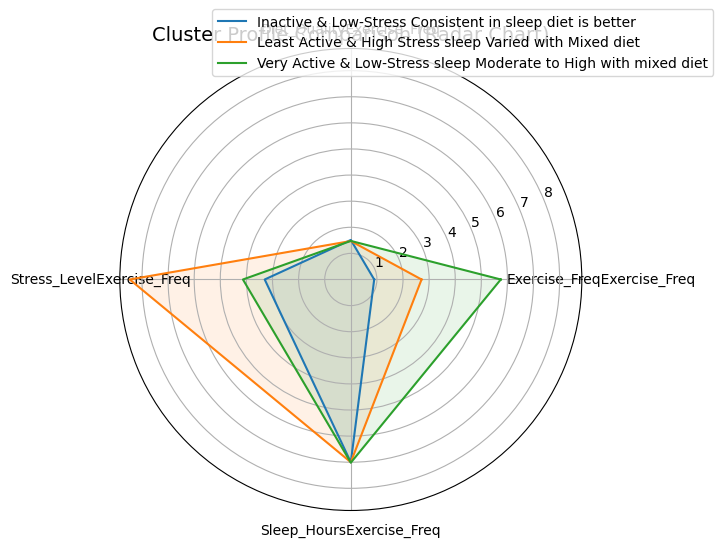

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Group by Cluster_Label
cluster_means = df.groupby("Cluster_Label")[["Exercise_Freq", "Diet_Quality", "Stress_Level", "Sleep_Hours"]].mean()

# Radar chart setup
labels = cluster_means.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
labels += [labels[0]]
angles += [angles[0]]

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for label, row in cluster_means.iterrows():
    values = row.tolist()
    values += [values[0]]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.1)

ax.set_title("Cluster Profile Comparison (Radar Chart)", size=14)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


In [54]:
#save the dataframe to a csv file
df.to_csv('clustered_health_lifestyle_data.csv', index=False)

In [55]:
#make a pkl
import pickle
with open('clustered_health_lifestyle_data.pkl', 'wb') as f:
    pickle.dump(df, f)

In [56]:
import pickle
#load the pkl file
with open('clustered_health_lifestyle_data.pkl', 'rb') as f:
    loaded_df = pickle.load(f)

In [57]:
loaded_df.head()

,Exercise_Freq,Diet_Quality,Stress_Level,Sleep_Hours,Cluster,PCA1,PCA2,Cluster_Label,short_descriptions
0,0,0,9,8.5,1,3.248953,-3.418137,Least Active & High Stress sleep Varied with M...,Least Active group with low physical activity ...
1,2,2,2,5.9,2,-3.662395,-1.087977,Inactive & Low-Stress Consistent in sleep diet...,"Inactive individuals with minimal exercise, lo..."
2,7,3,3,4.8,0,-2.410786,3.833493,Very Active & Low-Stress sleep Moderate to Hig...,Very Active individuals with high exercise fre...
3,4,3,9,6.6,1,3.429633,0.538689,Least Active & High Stress sleep Varied with M...,Least Active group with low physical activity ...
4,4,3,6,6.1,0,0.431558,0.692909,Very Active & Low-Stress sleep Moderate to Hig...,Very Active individuals with high exercise fre...
